Estimated coefficients:  1.4583 -2.0139
The equation for least squares fit is: y =  -2.0139 + 1.4583 x
The correlation coefficient is: r =  0.9562
The standard error of the estimate is:  1.3067


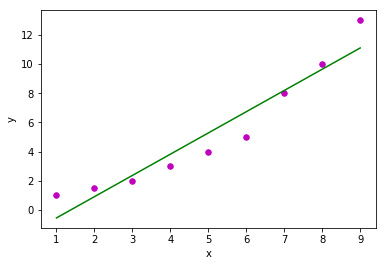

The solutions for the unknown values in the given system are: 
x =  [ 1.48809524 -0.45183983  0.19101732]
Check our solution by multiplying matrix A with x
The given value of b is: 
b = 1.4583
Ax =  [  47.5  325.  2438. ]
As shown Ax = b, therefore: 
x1 =  1.4880952380952364
x2 =  -0.45183982683982826
x3 =  0.19101731601731622
The equation for polynomial regression is: y =  1.4880952380952364 + -0.45183982683982826 x + 0.19101731601731622 x^2


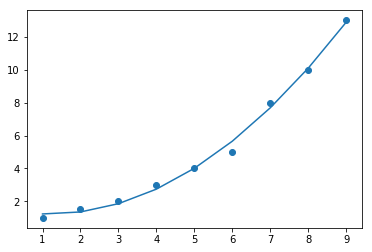

As shown, using polynomial regression to fit a parabola to the data is a much better fit compared to the linear model


In [6]:
#!/usr/bin/env python 
# Author: Frank Jenkins
# Problem 17.6, Chapra & Canale, Numerical Methods for Engineers, 6th Edition, McGraw Hill, New York, NY (2010).
# Numpy usage techniques: SciPy.org, NumPy v1.15 Manual, 2008-2018.
# Portions of code adapted from:
# Numerical Methods in Engineering with Python-3, J. Kiusalass, Cambridge Univ. Press, New York, NY (2013).
# Schilling & Harris, Applied Numerical Methods for Engineers Using Matlab and C, Brooks/Cole Publishing, Boston, MA (2000).
# Using least squares to fit a straight line and parabola to given data points.


import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations 
    n = np.size(x) 
  
    # mean of x and y  
    mx, my = np.mean(x), np.mean(y) 
    
    # sum of x and y
    sumx = sum(x)
    sumy = sum(y)
    
    # sum of x*y
    sxy = np.sum(x*y)
    
    # square of summation of x
    ssx = np.sum(x**2)
    
    a1 = (n*sxy - sumx*sumy)/(n*ssx - sumx**2)
    a0 = my - a1*mx 
     
    return(a1, a0) 

   

def corrcoef(x, y):
     # number of observations 
    n = np.size(x) 
  
    # mean of x and y  
    mx, my = np.mean(x), np.mean(y) 
    
    # sum of x and y
    sumx = sum(x)
    sumy = sum(y)
    
    # sum of x*y
    sxy = np.sum(x*y)
    
    ssx = np.sum(x**2)
    ssy = np.sum(y**2)
    ssumx = sumx**2
    ssumy = sumy**2
    r = (n*sxy - sumx*sumy)/(np.sqrt(abs(n*ssx - ssumx))*np.sqrt(abs(n*ssy - ssumy)))
    return r


    
def stderr(x, y):
    n = np.size(x) 
  
    mx, my = np.mean(x), np.mean(y) 
    
    sumx = sum(x)
    sumy = sum(y)
    
    sxy = np.sum(x*y)
    
    ssx = np.sum(x**2)
    
    a1 = (n*sxy - sumx*sumy)/(n*ssx - sumx**2)
    a0 = my - a1*mx
    
    sr = []
    for i in range(n):
        sr.append((y[i] - a0 - a1*x[i])**2)
    sr = np.array(sr)
    return sr
  
def plot_regression_line(x, y, b, c): 
    # plotting the points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response  
    y_pred = b + c*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # show plot 
    plt.show() 
  
# observations 
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 1.5, 2, 3, 4, 5, 8, 10, 13]) 
r = corrcoef(x, y)

  
# estimating coefficients 
b, c = estimate_coef(x, y) 
b = round(b, 4)
c = round(c, 4)

r = round(r, 4)

sr = stderr(x, y)
ssr = np.sum(sr)
err = np.sqrt(ssr/7)

err = round(err, 4)

print("Estimated coefficients: ", b, c) 
print("The equation for least squares fit is: y = ", c, "+", b, "x")
print("The correlation coefficient is: r = ", r)
print("The standard error of the estimate is: ", err)


# plotting regression line 
plot_regression_line(x, y, c, b) 

# Next, we use polynomial regression to fit a parabola to the data

from numpy import array, zeros, float, dot
from copy import copy

# Gauss elimination with partial pivoting for 3 x 3 system of equations

x1 = np.sum(x)
x2 = np.sum(x**2)
x3 = np.sum(x**3)
x4 = np.sum(x**4)
x5 = np.sum(y)
x6 = np.sum(np.multiply(x, y))
x7 = np.sum(np.multiply(x**2, y))

A = array([[9, x1, x2],
               [x1, x2, x3],
               [x2, x3, x4]])
B = array([x5, x6, x7])

	

def gausspp(A, B): # Gauss elimination with partial pivoting
    # Returns the vector x such that Ax=b
    
    n,m = A.shape
    C = zeros((n,m+1),float)
    C[:,0:n],C[:,n] = A,B

    for j in range(n):
        # first do partial pivoting.
        p = j 
        # search for largest element in column
        for i in range(j+1,n):
            if abs(C[i,j]) > abs(C[p,j]): p = i
        if abs(C[p,j]) < 1.0e-16:
            print("matrix is (likely) singular")
            return B
        # swap rows to get largest element on the diagonal
        C[p,:],C[j,:] = copy(C[j,:]),copy(C[p,:])
        # elimination
        ppivot = C[j,j]
        C[j,:] = C[j,:] / ppivot
        for i in range(n):
            if i == j: continue
            C[i,:] = C[i,:] - C[i,j]*C[j,:]
    I,X = C[:,0:n],C[:,n]
    return X


# x should be an n x 1 vector equal to b (with solutions for x1, x2, and x3)
X = gausspp(A,B)
print("The solutions for the unknown values in the given system are: ")

print("x = ", X)

# Check our solutions
print("Check our solution by multiplying matrix A with x")
print("The given value of b is: ")
print("b =", b)
import numpy as np
check = np.matmul(A, X)   
print("Ax = ", check)

if(check.all() == b.all()):
    print("As shown Ax = b, therefore: ")
else:
    print("Solution is incorrect, please check the format of your inputs")

f = (X[0])
g = (X[1])
h = (X[2])

print("x1 = ", f)
print("x2 = ", g)
print("x3 = ", h)

print("The equation for polynomial regression is: y = ", f, "+", g, "x", "+", h, "x^2")

t = np.linspace(0, 1, 200)
ypred = f + g*x + h*x**2

p = np.poly1d(np.polyfit(x, y, 3))
plt.scatter(x, y)
plt.plot(x, ypred)
plt.show()


print("As shown, using polynomial regression to fit a parabola to the data is a much better fit compared to the linear model")